<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=10>Artificial Intelligence and Machine Learning</center></font></h1>
<h1><center>Python Foundations - Week 4</center></h1>

<center><img src="https://cdn.pixabay.com/photo/2018/03/06/08/31/drone-3202860_1280.jpg" width="720"/></center>

<center><font size=5>Product Reviews Sentiment Analysis </center></font>

## Problem Statement

### Business Context

In the rapidly evolving landscape of e-commerce, customer reviews play a pivotal role in shaping the perception of products and influencing purchasing decisions. All businesses recognize the significance of understanding customer sentiment and extracting valuable insights from the vast pool of customer reviews to drive decisions. The inability to actively track customer feedback can result in significant challenges for businesses. Negative sentiments expressed by customers become crucial to track and resolve as they can lead to several detrimental effects, including:

1. **Customer Churn:** Unaddressed negative sentiment can lead to customer dissatisfaction and the potential loss of loyal customers. This may result in customers opting for alternative platforms for their future purchases, impacting long-term revenue and market share.

2. **Reputation Damage:** The persistence of negative sentiment, if not effectively managed, can tarnish the reputation of the business. Potential customers may be dissuaded from making purchases on the platform due to concerns raised in negative reviews, affecting brand loyalty and trust.

3. **Financial Implications:** Negative sentiment can lead to a decline in sales, impacting profitability. Discouraged by negative feedback, potential customers may choose competitors, resulting in direct financial repercussions for the company.

### Problem Definition

A rapidly growing e-commerce platform specializing in electronic gadgets collects customer feedback through multiple channels, such as product review forms, surveys, and social media platforms. Following a 200% growth in their customer base over the past three years, the business has recently observed a ~25% increase in feedback volume within the last six months.

Previously relying on manual tracking and analysis, the surge in feedback has exceeded their capacity to manage it effectively. To address this, the organization aims to implement a scalable, automated solution that employs a **lexicon-based sentiment analyzer**. The objective is to develop a model that can efficiently assess and categorize customer feedback into positive, negative, or neutral sentiments by analyzing product reviews using predefined sentiment dictionaries and rules.

As a Data Scientist, you are provided with a dataset of customer reviews, each labeled with its corresponding sentiment. Your task is to build a sentiment analyzer to parse customer reviews and accurately predict their sentiment.

### Data Dictionary

- **Product ID**: An exclusive identification number for each product

- **Product Review**: Insights and opinions shared by customers about the product

- **Sentiment**: Sentiment associated with the product review, indicating whether the review expresses a positive, negative, or neutral sentiment

## Installing and Importing the necessary libraries

In [1]:
!export SSL_CERT_FILE=/Users/jithinravi/certs/cacert.pem

In [34]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
    


In [33]:
import ssl
import certifi
import nltk

ssl._create_default_https_context = lambda: ssl.create_default_context(cafile=certifi.where())

nltk.download('stopwords')
nltk.download('wordnet')



[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>
[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


False

In [43]:
# to read and manipulate the data
import pandas as pd
import numpy as np

pd.set_option('max_colwidth', None)    # setting column to the maximum column width as per the data

# to visualise data
import matplotlib.pyplot as plt
import seaborn as sns

# to use regular expressions for manipulating text data
import re

# to load the natural language toolkit
import nltk

# to remove common stop words
from nltk.corpus import stopwords

# to perform stemming
from nltk.stem.porter import PorterStemmer


# Create an unverified SSL context
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

nltk.download('stopwords')    # loading the stopwords
nltk.download('wordnet')    # loading the wordnet module that is used in stemming

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>
[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


False

In [40]:
print(os.environ['SSL_CERT_FILE'])


/Users/jithinravi/certs/cacert.pem


## Loading the dataset

In [ ]:
# uncomment and run the following lines of code if Google Colab is being used
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
# loading data into a pandas dataframe
reviews = pd.read_csv("/Users/jithinravi/work/python/ut_ai_ml/sampledata/week4/Product_Reviews.csv")


In [6]:
# creating a copy of the data
data = reviews.copy()

## Data Overview

### Checking the first five rows of the data

In [7]:
data.head(5)

,Product ID,Product Review,Sentiment
0,AVpe7AsMilAPnD_xQ78G,"I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about customs, which I may have if I used a third party shipping service.",POSITIVE
1,AVpe7AsMilAPnD_xQ78G,"Allow me to preface this with a little history. I am (was) a casual reader who owned a Nook Simple Touch from 2011. I've read the Harry Potter series, Girl with the Dragon Tattoo series, 1984, Brave New World, and a few other key titles. Fair to say my Nook did not get as much use as many others may have gotten from theirs.Fast forward to today. I have had a full week with my new Kindle Paperwhite and I have to admit, I'm in love. Not just with the Kindle, but with reading all over again! Now let me relate this review, love, and reading all back to the Kindle. The investment of 139.00 is in the experience you will receive when you buy a Kindle. You are not simply paying for a screen there is an entire experience included in buying from Amazon.I have been reading The Hunger Games trilogy and shall be moving onto the Divergent series soon after. Here is the thing with the Nook that hindered me for the past 4 years: I was never inspired to pick it up, get it into my hands, and just dive in. There was never that feeling of oh man, reading on this thing is so awesome. However, with my Paperwhite, I now have that feeling! That desire is back and I simply adore my Kindle. If you are considering purchasing one, stop thinking about it simply go for it. After a full week, 3 downloaded books, and a ton of reading, I still have half of my battery left as well.Make yourself happy. Inspire the reader inside of you.",POSITIVE
2,AVpe7AsMilAPnD_xQ78G,I am enjoying it so far. Great for reading. Had the original Fire since 2012. The Fire used to make my eyes hurt if I read too long. Haven't experienced that with the Paperwhite yet.,POSITIVE
3,AVpe7AsMilAPnD_xQ78G,"I bought one of the first Paperwhites and have been very pleased with it its been a constant companion and I suppose Ive read, on average, a book every three days for the past however many years on it. I wouldnt give it up youd have to pry it from my cold dead fingers.For sundry logistical reasons, Ive also made good use of Amazons Kindle app on my iPhone. No Paperwhite screen, naturally, and all the cool usability that delivers, but it works well and has its own attractions as a companion to the Kindle.Of course, there are aspects of the Paperwhite which I would like to critique. Ah you knew that was coming somewhere, didnt you.As a member of BookBub, I get a daily list of alerts and book deals in my chosen genres. I take on many of them, however, Ive found that, even with the best will in the world, I cant keep up. Some days it seems that for every book I read, Ive bought two. Theres just so much good stuff out there! The accumulative effect of this is that the number of books actually on my Paperwhite has been creeping ever upward for some time. Its now at about 400.With this in mind, Ive noticed that while page-turning has remained exactly the 

### Checking the shape of the dataset

In [8]:
data.shape

(1007, 3)

* The dataset has 1007 rows and 3 columns.

### Checking for Missing Values

In [9]:
data.isnull().sum()

Product ID        0
Product Review    0
Sentiment         0
dtype: int64

* There are no missing values in the data

### Checking for duplicate values

In [10]:
# checking for duplicate values
data.duplicated().sum()

np.int64(2)

* There are 2 duplicate values in the dataset.
* We'll drop them.

In [11]:
# dropping duplicate values
data = data.drop_duplicates()

data.duplicated().sum()

np.int64(0)

## Exploratory Data Analysis (EDA)


#### Distribution of sentiments

<Axes: xlabel='Sentiment', ylabel='percent'>

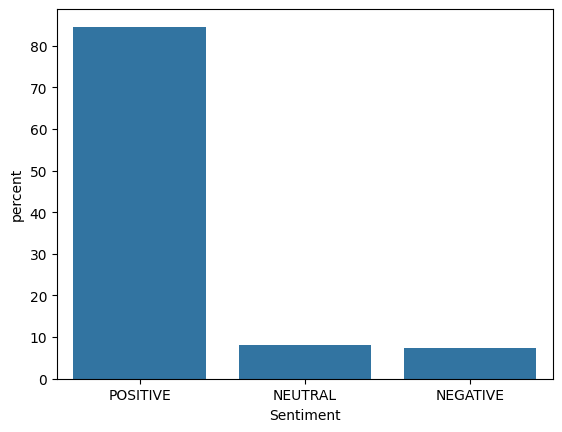

In [12]:
sns.countplot(data=data, x="Sentiment", stat='percent')

- Majority of the reviews are positive (\~85%), followed by neutral reviews (8%), and then the positive reviews (\~7%)

## Text Preprocessing

### Removing special characters from the text

In [14]:
# defining a function to remove special characters
def remove_special_characters(text):
    # Defining the regex pattern to match non-alphanumeric characters
    pattern = '[^A-Za-z0-9]+'

    # Finding the specified pattern and replacing non-alphanumeric characters with a blank string
    new_text = ''.join(re.sub(pattern, ' ', text))

    return new_text

In [15]:
# Applying the function to remove special characters
data['cleaned_text'] = data['Product Review'].apply(remove_special_characters)

In [16]:
# checking a couple of instances of cleaned data
data.loc[0:3, ['Product Review','cleaned_text']]

,Product Review,cleaned_text
0,"I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about customs, which I may have if I used a third party shipping service.",I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing the paperwhite is great but if you have spending money go for the voyage Fortunately I had friends who owned each so I ended up buying the paperwhite on this basis both models now have 300 ppi so the 80 dollar jump turns out pricey the voyage s page press isn t always sensitive and if you are fine with a specific setting you don t need auto light adjustment It s been a week and I am loving my paperwhite no regrets The touch screen is receptive and easy to use and I keep the light at a specific setting regardless of the time of day In any case it s not hard to change the setting either as you ll only be changing the light level at a certain time of day not every now and then while reading Also glad that I went for the international shipping option with Amazon Extra expense but delivery was on time with tracking and I didnt need to worry about customs which I may have if I used a third party shipping service
1,"Allow me to preface this with a little history. I am (was) a casual reader who owned a Nook Simple Touch from 2011. I've read the Harry Potter series, Girl with the Dragon Tattoo series, 1984, Brave New World, and a few other key titles. Fair to say my Nook did not get as much use as many others may have gotten from theirs.Fast forward to today. I have had a full week with my new Kindle Paperwhite and I have to admit, I'm in love. Not just with the Kindle, but with reading all over again! Now let me relate this review, love, and reading all back to the Kindle. The investment of 139.00 is in the experience you will receive when you buy a Kindle. You are not simply paying for a screen there is an entire experience included in buying from Amazon.I have been reading The Hunger Games trilogy and shall be moving onto the Divergent series soon after. Here is the thing with the Nook that hindered me for the past 4 years: I was never inspired to pick it up, get it into my hands, and just dive in. There was never that feeling of oh man, reading on this thing is so awesome. However, with my Paperwhite, I now have that feeling! That desire is back and I simply adore my Kindle. If you are considering purchasing one, stop thinking about it simply go for it. After a full week, 3 downloaded books, and a ton of reading, I still have half of my battery left as well.Make yourself happy. Inspire the reader inside of you.",Allow me to preface this with a little history I am was a casual reader who owned a Nook Simple Touch from 2011 I ve read the Harry Potter series Girl with the Dragon Tattoo series 1984 Brave New World and a few other key titles Fair to say my Nook did not get as much use as many others may have gotten from theirs Fast forward to today I have had a full week with my new Kindle Paperwhite and I have to admit I m in love Not just w

- We can observe that the function removed the special characters and retained the alphabets and numbers.

### Lowercasing

In [17]:
# changing the case of the text data to lower case
data['cleaned_text'] = data['cleaned_text'].str.lower()

In [18]:
# checking a couple of instances of cleaned data
data.loc[0:3, ['Product Review','cleaned_text']]

,Product Review,cleaned_text
0,"I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about customs, which I may have if I used a third party shipping service.",i initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing the paperwhite is great but if you have spending money go for the voyage fortunately i had friends who owned each so i ended up buying the paperwhite on this basis both models now have 300 ppi so the 80 dollar jump turns out pricey the voyage s page press isn t always sensitive and if you are fine with a specific setting you don t need auto light adjustment it s been a week and i am loving my paperwhite no regrets the touch screen is receptive and easy to use and i keep the light at a specific setting regardless of the time of day in any case it s not hard to change the setting either as you ll only be changing the light level at a certain time of day not every now and then while reading also glad that i went for the international shipping option with amazon extra expense but delivery was on time with tracking and i didnt need to worry about customs which i may have if i used a third party shipping service
1,"Allow me to preface this with a little history. I am (was) a casual reader who owned a Nook Simple Touch from 2011. I've read the Harry Potter series, Girl with the Dragon Tattoo series, 1984, Brave New World, and a few other key titles. Fair to say my Nook did not get as much use as many others may have gotten from theirs.Fast forward to today. I have had a full week with my new Kindle Paperwhite and I have to admit, I'm in love. Not just with the Kindle, but with reading all over again! Now let me relate this review, love, and reading all back to the Kindle. The investment of 139.00 is in the experience you will receive when you buy a Kindle. You are not simply paying for a screen there is an entire experience included in buying from Amazon.I have been reading The Hunger Games trilogy and shall be moving onto the Divergent series soon after. Here is the thing with the Nook that hindered me for the past 4 years: I was never inspired to pick it up, get it into my hands, and just dive in. There was never that feeling of oh man, reading on this thing is so awesome. However, with my Paperwhite, I now have that feeling! That desire is back and I simply adore my Kindle. If you are considering purchasing one, stop thinking about it simply go for it. After a full week, 3 downloaded books, and a ton of reading, I still have half of my battery left as well.Make yourself happy. Inspire the reader inside of you.",allow me to preface this with a little history i am was a casual reader who owned a nook simple touch from 2011 i ve read the harry potter series girl with the dragon tattoo series 1984 brave new world and a few other key titles fair to say my nook did not get as much use as many others may have gotten from theirs fast forward to today i have had a full week with my new kindle paperwhite and i have to admit i m in love not just w

- We can observe that all the text has now successfully been converted to lower case.

### Removing extra whitespace

In [19]:
# removing extra whitespaces from the text
data['cleaned_text'] = data['cleaned_text'].str.strip()

In [20]:
# checking a couple of instances of cleaned data
data.loc[0:3, ['Product Review','cleaned_text']]

,Product Review,cleaned_text
0,"I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about customs, which I may have if I used a third party shipping service.",i initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing the paperwhite is great but if you have spending money go for the voyage fortunately i had friends who owned each so i ended up buying the paperwhite on this basis both models now have 300 ppi so the 80 dollar jump turns out pricey the voyage s page press isn t always sensitive and if you are fine with a specific setting you don t need auto light adjustment it s been a week and i am loving my paperwhite no regrets the touch screen is receptive and easy to use and i keep the light at a specific setting regardless of the time of day in any case it s not hard to change the setting either as you ll only be changing the light level at a certain time of day not every now and then while reading also glad that i went for the international shipping option with amazon extra expense but delivery was on time with tracking and i didnt need to worry about customs which i may have if i used a third party shipping service
1,"Allow me to preface this with a little history. I am (was) a casual reader who owned a Nook Simple Touch from 2011. I've read the Harry Potter series, Girl with the Dragon Tattoo series, 1984, Brave New World, and a few other key titles. Fair to say my Nook did not get as much use as many others may have gotten from theirs.Fast forward to today. I have had a full week with my new Kindle Paperwhite and I have to admit, I'm in love. Not just with the Kindle, but with reading all over again! Now let me relate this review, love, and reading all back to the Kindle. The investment of 139.00 is in the experience you will receive when you buy a Kindle. You are not simply paying for a screen there is an entire experience included in buying from Amazon.I have been reading The Hunger Games trilogy and shall be moving onto the Divergent series soon after. Here is the thing with the Nook that hindered me for the past 4 years: I was never inspired to pick it up, get it into my hands, and just dive in. There was never that feeling of oh man, reading on this thing is so awesome. However, with my Paperwhite, I now have that feeling! That desire is back and I simply adore my Kindle. If you are considering purchasing one, stop thinking about it simply go for it. After a full week, 3 downloaded books, and a ton of reading, I still have half of my battery left as well.Make yourself happy. Inspire the reader inside of you.",allow me to preface this with a little history i am was a casual reader who owned a nook simple touch from 2011 i ve read the harry potter series girl with the dragon tattoo series 1984 brave new world and a few other key titles fair to say my nook did not get as much use as many others may have gotten from theirs fast forward to today i have had a full week with my new kindle paperwhite and i have to admit i m in love not just w

### Removing stopwords

* The idea with stop word removal is to **exclude words that appear frequently throughout** all the documents in the corpus.
* Pronouns and articles are typically categorized as stop words.
* The `NLTK` library has an in-built list of stop words and it can utilize that list to remove the stop words from a dataset.

In [21]:
 stopwords.words('english')
 

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/Users/jithinravi/nltk_data'
    - '/Users/jithinravi/work/python/ut_ai_ml/.venv/nltk_data'
    - '/Users/jithinravi/work/python/ut_ai_ml/.venv/share/nltk_data'
    - '/Users/jithinravi/work/python/ut_ai_ml/.venv/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [22]:
# defining a function to remove stop words using the NLTK library
def remove_stopwords(text):
    # Split text into separate words
    words = text.split()

    # Removing English language stopwords
    new_text = ' '.join([word for word in words if word not in stopwords.words('english')])

    return new_text
    

In [ ]:
# Applying the function to remove stop words using the NLTK library
data['cleaned_text_without_stopwords'] = data['cleaned_text'].apply(remove_stopwords)

In [ ]:
# checking a couple of instances of cleaned data
data.loc[0:3,['cleaned_text','cleaned_text_without_stopwords']]

,cleaned_text,cleaned_text_without_stopwords
0,i initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing the paperwhite is great but if you have spending money go for the voyage fortunately i had friends who owned each so i ended up buying the paperwhite on this basis both models now have 300 ppi so the 80 dollar jump turns out pricey the voyage s page press isn t always sensitive and if you are fine with a specific setting you don t need auto light adjustment it s been a week and i am loving my paperwhite no regrets the touch screen is receptive and easy to use and i keep the light at a specific setting regardless of the time of day in any case it s not hard to change the setting either as you ll only be changing the light level at a certain time of day not every now and then while reading also glad that i went for the international shipping option with amazon extra expense but delivery was on time with tracking and i didnt need to worry about customs which i may have if i used a third party shipping service,initially trouble deciding paperwhite voyage reviews less said thing paperwhite great spending money go voyage fortunately friends owned ended buying paperwhite basis models 300 ppi 80 dollar jump turns pricey voyage page press always sensitive fine specific setting need auto light adjustment week loving paperwhite regrets touch screen receptive easy use keep light specific setting regardless time day case hard change setting either changing light level certain time day every reading also glad went international shipping option amazon extra expense delivery time tracking didnt need worry customs may used third party shipping service
1,allow me to preface this with a little history i am was a casual reader who owned a nook simple touch from 2011 i ve read the harry potter series girl with the dragon tattoo series 1984 brave new world and a few other key titles fair to say my nook did not get as much use as many others may have gotten from theirs fast forward to today i have had a full week with my new kindle paperwhite and i have to admit i m in love not just with the kindle but with reading all over again now let me relate this review love and reading all back to the kindle the investment of 139 00 is in the experience you will receive when you buy a kindle you are not simply paying for a screen there is an entire experience included in buying from amazon i have been reading the hunger games trilogy and shall be moving onto the divergent series soon after here is the thing with the nook that hindered me for the past 4 years i was never inspired to pick it up get it into my hands and just dive in there was never that feeling of oh man reading on this thing is so awesome however with my paperwhite i now have that feeling that desire is back and i simply adore my kindle if you are considering purchasing one stop thinking about it simply go for it after a full week 3 downloaded books and a ton of reading i still have half of my battery left as well make yourself happy inspire the reader inside of you,allow preface little history casual reader owned nook simple touch 2011 read harry potter series girl dragon tattoo series 1984 brave new world key titles fair say nook get much use many others may gotten fast forward today full week new kindle paperwhite admit love kindle reading let relate review love reading back kindle investment 139 00 experience receive buy kindle simply paying screen entire experience included buying amazon reading hunger games trilogy shall moving onto divergent series soon thing nook hindered past 4 years never inspired pick get hands dive never feeling oh man reading thing awesome however paperwhite feeling desire back simply adore kindle considering purchasing one stop thinking simply go full week 3 downloaded books ton reading still half battery left well make happy inspire reader inside
2,i am enjoying it so far great for reading had the o

* We observe that all the stopwords have been removed.

### Stemming

Stemming is a language processing method that chops off word endings to find the root or base form of words.

For example,

- Original Word: Jumping, Stemmed Word: Jump
- Original Word: Running, Stemmed Word: Run

The Porter Stemmer is one of the widely-used algorithms for stemming, and it shorten words to their root form by removing suffixes.

In [3]:
# Loading the Porter Stemmer
ps = PorterStemmer()

In [ ]:
# defining a function to perform stemming
def apply_porter_stemmer(text):
    # Split text into separate words
    words = text.split()

    # Applying the Porter Stemmer on every word of a message and joining the stemmed words back into a single string
    new_text = ' '.join([ps.stem(word) for word in words])

    return new_text

In [ ]:
# Applying the function to perform stemming
data['final_cleaned_text'] = data['cleaned_text_without_stopwords'].apply(apply_porter_stemmer)

In [ ]:
# checking a couple of instances of cleaned data
data.loc[0:2,['cleaned_text_without_stopwords','final_cleaned_text']]

,cleaned_text_without_stopwords,final_cleaned_text
0,initially trouble deciding paperwhite voyage reviews less said thing paperwhite great spending money go voyage fortunately friends owned ended buying paperwhite basis models 300 ppi 80 dollar jump turns pricey voyage page press always sensitive fine specific setting need auto light adjustment week loving paperwhite regrets touch screen receptive easy use keep light specific setting regardless time day case hard change setting either changing light level certain time day every reading also glad went international shipping option amazon extra expense delivery time tracking didnt need worry customs may used third party shipping service,initi troubl decid paperwhit voyag review less said thing paperwhit great spend money go voyag fortun friend own end buy paperwhit basi model 300 ppi 80 dollar jump turn pricey voyag page press alway sensit fine specif set need auto light adjust week love paperwhit regret touch screen recept easi use keep light specif set regardless time day case hard chang set either chang light level certain time day everi read also glad went intern ship option amazon extra expens deliveri time track didnt need worri custom may use third parti ship servic
1,allow preface little history casual reader owned nook simple touch 2011 read harry potter series girl dragon tattoo series 1984 brave new world key titles fair say nook get much use many others may gotten fast forward today full week new kindle paperwhite admit love kindle reading let relate review love reading back kindle investment 139 00 experience receive buy kindle simply paying screen entire experience included buying amazon reading hunger games trilogy shall moving onto divergent series soon thing nook hindered past 4 years never inspired pick get hands dive never feeling oh man reading thing awesome however paperwhite feeling desire back simply adore kindle considering purchasing one stop thinking simply go full week 3 downloaded books ton reading still half battery left well make happy inspire reader inside,allow prefac littl histori casual reader own nook simpl touch 2011 read harri potter seri girl dragon tattoo seri 1984 brave new world key titl fair say nook get much use mani other may gotten fast forward today full week new kindl paperwhit admit love kindl read let relat review love read back kindl invest 139 00 experi receiv buy kindl simpli pay screen entir experi includ buy amazon read hunger game trilog shall move onto diverg seri soon thing nook hinder past 4 year never inspir pick get hand dive never feel oh man read thing awesom howev paperwhit feel desir back simpli ador kindl consid purchas one stop think simpli go full week 3 download book ton read still half batteri left well make happi inspir reader insid
2,enjoying far great reading original fire since 2012 fire used make eyes hurt read long experienced paperwhite yet,enjoy far great read origin fire sinc 2012 fire use make eye hurt read long experienc paperwhit yet


## Lexicon-based Sentiment Analysis


- VADER (Valence Aware Dictionary and Sentiment Reasoner) is a rule-based, open-source tool specifically designed for sentiment analysis on social media text.
- Developed by C.J. Hutto and Eric Gilbert, VADER focuses on identifying the sentiment polarity (positive, neutral, or negative) of short texts.
- It uses a dictionary of words with predefined sentiment scores, considering linguistic nuances like slang, emoticons, and punctuation (e.g., exclamation marks for emphasis).

In [4]:
#Installing the vaderSentiment library
!pip install vaderSentiment -U -q
# !pip install vaderSentiment --upgrade -q


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


The `SentimentIntensityAnalyzer` class in VADER is a tool that calculates the sentiment intensity of text, giving scores for positive, negative, neutral, and overall (compound) sentiment. It's optimized for social media language and short texts.

- Sentiment ratings were obtained from 10 independent human raters, all pre-screened, trained, and quality-checked to ensure optimal inter-rater reliability.  

- Over 9,000 token features were evaluated on a scale from “[–4] Extremely Negative” to “[4] Extremely Positive,” with an option for “[0] Neutral (or Neither, N/A).”  

- This process resulted in over 7,500 validated lexical features, each with valence scores indicating both sentiment polarity (positive/negative) and sentiment intensity on a scale from –4 to +4.  

- Example valence scores:  
  - “Okay”: 0.9 (Moderate positivity, suggests something is acceptable)
  - “Good”: 1.9 (Positive word, commonly used for approval)
  - “Great”: 3.1 (Very positive word, implies enthusiasm or high quality)
  - “Horrible”: –2.5 (Strongly negative word, indicates something very bad)
  - Frowning emoticon :( : –2.2 (Symbolizes sadness or dissatisfaction)

In [ ]:
#Importing the SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
# creating an instance
sentiment = SentimentIntensityAnalyzer()


- The `make_lex_dict` function in VADER is used to create a dictionary of words and their associated sentiment scores.
- This dictionary is the core of VADER’s sentiment analysis, as it assigns numerical sentiment values to individual words, which the analyzer then uses to calculate the overall sentiment of a given text.
- The dictionary includes scores for words, slang, and emoticons, enabling VADER to handle informal language effectively.

In [ ]:
lexicon_dict = sentiment.make_lex_dict()

In [ ]:
lexicon_dict['amazing']

2.8

- "amazing" has a high positive score, indicating strong approval or admiration.
- Its intensity reflects a very favorable sentiment, often used to describe something exceptional.

In [ ]:
lexicon_dict['worst']

-3.1

- A lexicon score of -3.1 suggests that "worst" is associated with strong negative connotations.
- Words with highly negative scores often convey dissatisfaction, failure, or poor quality.

- Now, let's get the valence scores for the words present in one of the reviews in the dataset.
- Since the lexicon dictionary is limited, not all words will be present. Therefore, we need to check for words that are included in the lexicon dictionary.

In [ ]:
# Original product review
review = data['Product Review'].loc[0]
review

"I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about cu

In [ ]:
len(review.split(' '))

193

- This review has ~200 words in it.

In [ ]:
for i in review.split(' '):
    if i in lexicon_dict:
       print(i,lexicon_dict[i])

trouble -1.7
friends 2.1
fine 0.8
loving 2.9
no -1.2
easy 1.9
hard -0.4
certain 1.1
glad 2.0
worry -1.9
party 1.7


- Out of 193 words, 11 words were part of the lexicon dictionary.
- Words expressing negative emotions or difficulties, like "trouble" and "worry," have strong negative scores.
- Positive relationship words such as "friends" and "loving" carry high positive scores, reflecting warmth and approval.
- Neutral or mildly positive terms like "fine" and "certain" have lower positive scores, suggesting mild positivity or assurance.
- Negative polarity words, like "no" and "hard," have relatively low negative scores, showing less intensity in negativity compared to words like "trouble."

Although we have the valence scores for individual words, we can't determine the review's sentiment without a single score for the entire review/text.

The ***compound score*** combines all individual valence scores into a single score for the entire review/text.

- The compound score is computed by summing the valence scores of each word in the lexicon and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive).

- This is the most useful metric if you want a single unidimensional measure of sentiment for a given review/text.

The `polarity_scores()` method returns a dictionary with sentiment scores, including the compound score, which summarizes the overall sentiment of the text.

In [ ]:
comp_score = sentiment.polarity_scores([review])
comp_score

{'neg': 0.008, 'neu': 0.819, 'pos': 0.172, 'compound': 0.9882}

- The review is predominantly neutral, with a high neutral score of 0.819.
- There is a slight positive sentiment, reflected by the positive score of 0.172.
- The compound score of 0.9882 indicates an overall highly positive sentiment.

We know that the compound score lies in the range [-1, 1]. However, we need a decision rule to determine whether the review is positive, negative, or neutral.

- Many decision rules can be used to determine sentiment based on the compound score.
- A common rule is:
  - **Positive** if compound ≥ 0.5 (strong positive sentiment).
  - **Neutral** if -0.5 < compound < 0.5 (balanced or mild sentiment).
  - **Negative** if compound ≤ -0.5 (strong negative sentiment).

- Neutral sentiment is more common in text, so it gets a larger range (-0.5 to 0.5) to capture mild or mixed emotions.
- To classify as positive or negative, we need to be more certain, so the ranges are restricted: positive is set to compound ≥ 0.5, and negative to compound ≤ -0.5. This ensures that only texts with strong, clear sentiment are labeled as positive or negative.

For more information, kindly check [here](https://vadersentiment.readthedocs.io/en/latest/pages/about_the_scoring.html).

In [ ]:
def sentiment_comp(x):
    if x >= 0.5:
        return 'POSITIVE'
    elif x <= -0.5:
        return 'NEGATIVE'
    else:
        return 'NEUTRAL'

In [ ]:
sentiment_comp(comp_score['compound'])

'POSITIVE'

- We can observe that the overall sentiment of the review is '**POSITIVE**'

- We have estimated the sentiment of a single review.
- Let's scale it up and estimate the sentiment of all the reviews.
- Until now, we have focused on the original review to gain a clear understanding. From now on, we will work with the cleaned reviews.

In [ ]:
data['Sentiment_Predicted']  = data['final_cleaned_text'].apply(lambda x: sentiment_comp(sentiment.polarity_scores(x)['compound']))

In [ ]:
data[['Product Review','Sentiment_Predicted']].head(3)

,Product Review,Sentiment_Predicted
0,"I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about customs, which I may have if I used a third party shipping service.",POSITIVE
1,"Allow me to preface this with a little history. I am (was) a casual reader who owned a Nook Simple Touch from 2011. I've read the Harry Potter series, Girl with the Dragon Tattoo series, 1984, Brave New World, and a few other key titles. Fair to say my Nook did not get as much use as many others may have gotten from theirs.Fast forward to today. I have had a full week with my new Kindle Paperwhite and I have to admit, I'm in love. Not just with the Kindle, but with reading all over again! Now let me relate this review, love, and reading all back to the Kindle. The investment of 139.00 is in the experience you will receive when you buy a Kindle. You are not simply paying for a screen there is an entire experience included in buying from Amazon.I have been reading The Hunger Games trilogy and shall be moving onto the Divergent series soon after. Here is the thing with the Nook that hindered me for the past 4 years: I was never inspired to pick it up, get it into my hands, and just dive in. There was never that feeling of oh man, reading on this thing is so awesome. However, with my Paperwhite, I now have that feeling! That desire is back and I simply adore my Kindle. If you are considering purchasing one, stop thinking about it simply go for it. After a full week, 3 downloaded books, and a ton of reading, I still have half of my battery left as well.Make yourself happy. Inspire the reader inside of you.",POSITIVE
2,I am enjoying it so far. Great for reading. Had the original Fire since 2012. The Fire used to make my eyes hurt if I read too long. Haven't experienced that with the Paperwhite yet.,NEUTRAL


- As expected, the sentiment has been estimated for all the reviews.

- **Review 0 (Positive)**: The reviewer expresses clear satisfaction with the Paperwhite over the Voyage, mentioning specific features like the screen, touch sensitivity, and light settings, along with positive emotions like "loving" the device and no regrets.
- **Review 1 (Positive)**: The reviewer is enthusiastic about the Kindle Paperwhite, describing a renewed love for reading, positive experiences with the device, and an overall emotional connection, calling the Kindle a worthy investment.
- **Review 2 (Neutral)**: The reviewer mentions enjoyment of the Paperwhite for reading but provides a more neutral tone, mentioning only a mild positive experience without strong emotional language or specific praise, and no significant issues.

- Now that we have estimated the sentiment for the reviews, we also want to understand how the algorithm performed.

- To do that, we will compare the estimated sentiment with the actual sentiment.
  - One way is to compute the accuracy.

In [ ]:
num_correct = (data['Sentiment_Predicted'] == data['Sentiment']).sum()

In [ ]:
accuracy = num_correct/data.shape[0]

In [ ]:
print("Accuracy ",accuracy)

Accuracy  0.6895522388059702


- We can observe that the accuracy is 69%.
  - This means that the algorithm correctly predicted the sentiment of the review 69% of the time, indicating a moderately strong performance, but there is still room for improvement in its accuracy.
  - This also means that the algorithm incorrectly predicted the sentiment for 31% of the reviews.

In [ ]:
num_correct_positive = data[((data['Sentiment'] == 'POSITIVE') & (data['Sentiment_Predicted'] == 'POSITIVE'))]['Product Review'].count()
perc_correct_positive = num_correct_positive / data[(data['Sentiment'] == 'POSITIVE')].shape[0]
perc_correct_positive

0.7823529411764706

In [ ]:
num_correct_negative = data[((data['Sentiment'] == 'NEGATIVE') & (data['Sentiment_Predicted'] == 'NEGATIVE'))]['Product Review'].count()
perc_correct_negative = num_correct_negative / data[(data['Sentiment'] == 'NEGATIVE')].shape[0]
perc_correct_negative

0.12162162162162163

In [ ]:
num_correct_neutral = data[((data['Sentiment'] == 'NEUTRAL') & (data['Sentiment_Predicted'] == 'NEUTRAL'))]['Product Review'].count()
perc_correct_neutral= num_correct_neutral / data[(data['Sentiment'] == 'NEUTRAL')].shape[0]
perc_correct_neutral

0.2345679012345679

In [ ]:
data.Sentiment.value_counts(normalize=True)

,proportion
Sentiment,
POSITIVE,0.845771
NEUTRAL,0.080597
NEGATIVE,0.073632


- While the algorithm does pretty good in the positive reviews, it fails to correctly identify large proportions of the neutral and negative reviews.

Let's understand the cases in which the algorithm made mistakes. We will only focus on the two cases below and the same approach can be extended for the other cases.

- Case when the actual sentiment is NEUTRAL and the estimated sentiment is POSITIVE

- Case when the actual sentiment is NEGATIVE and the estimated sentiment is POSITIVE

In [ ]:
data[((data['Sentiment']=='NEUTRAL') & (data['Sentiment_Predicted']=='POSITIVE'))]['Product Review'].head(3)

,Product Review
17,"The Kindle is my first e-ink reader. I own an iPad, an iPhone, and have owned a Windows-based phone in the past that I used as an ereader.My overall impression of the device is good.The good:I'd honestly rather read linear (read from page one to the end, one page at a time) fiction from it than a book, because I can't always get comfortable with a book. Hardcovers are sometimes a bit heavy, and paperbacks don't always lie open easily. The Kindle is incredibly light and thin. I can hold it in one hand easily. The page turn buttons are conveniently located. Page-turns aren't instant, but they're probably quicker than turning a physical page in a printed book (there are just a lot more page-turns unless you choose a small font). The contrast is better than other ereaders I've seen. There is zero eye strain in good light. My eyesight isn't the greatest and I like being able to increase the font size and read without glasses. I love being able to browse the Kindle store and read samples before deciding to purchase. The experimental browser is surprisingly usable, but isn't great. It is useful for browsing wikipedia and blogs. The biggest drawback to the browser is the awkward pointer navigation, using the 5-way pad. It syncs your furthest read page over the internet so you can pick up where you left off using your iPhone or iPad.The so-so:The kindle store could use more categories and sorting options. You can't sort by top rated, and there is no category for alternate histories, for example. Finding a very-specific type of fiction relies on keyword searches, which don't do a great job. The wifi sometimes doesn't connect before it times-out.Read more"
26,Like a previous reviewer mentioned it is fabric over hard plastic it is not a snug or tight fit. Good quality though.
35,"Updated 12/8/2014One year in...This review is for the the no-ad 64 GB wifi-only HDX 8.9.I use a Galaxy S5 Android smartphone so the HDX is for media / web surfing / offline viewing for travel. Since I had already been using Amazon Prime and Prime Music it was a no brainer for me to use the HDX to fill the role of media / web surfing on a tablet.Be informed about the download limitations to this device. Amazon has been adding clarification to this which should help would-be purchasers make a more informed opinion. This wasn't as obvious as it should have been when I ordered mine so they're listening which is good.Be aware that their most popular Prime content *may* not be available to download (and save) to your HDX. You can save certain videos to your HDX but you won't know which ones until you buy an HDX and try it out. *** Edited 12/21/2013 You can now see a list of Prime movies and shows that can be downloaded to the device. That's an improvement and more clearly shows the available downloadable Prime content. +1 for Amazon. ***I was also under the assumption that you could download as many videos as you'd like with the limiting factor being the memory capacity of the HDX. Also NOT the case. So again, I bought the larger capacity HDX under this assumption. That was dumb on my part as it turns out because you're not limited by storage capacity. You're limited the NUMBER of downloads you can have on your device. Kids' content can be really short so you may find yourself running into that limitation, but most people never will.Read more"


- The lexicon analyzer might interpret this as positive because as per the review, the user enjoys the Kindle's lightness, ease of reading, good contrast, and adjustable font, which improve comfort over physical books. However, it fails to capture the drawbacks shared by the user, like limited store categorization, and occasional Wi-Fi issues, which downgrade the overall reading experience.

- The lexicon analyzer might interpret this as positive due to words like “good quality” and “hard plastic,” which often carry positive connotations. However, the actual sentiment is neutral because the reviewer is simply describing the product's material and fit without strong positive or negative feelings. Words like “not a snug or tight fit” add a hint of disappointment, but this nuance may be missed by the lexicon, causing a mismatch.

- The lexicon analyzer might interpret this as positive due to phrases like "no brainer," "Amazon has been adding clarification," "they're listening," and "improvement," which generally suggest satisfaction. However, the actual sentiment is more neutral because the reviewer highlights limitations around download capabilities and storage assumptions, which impacted their initial expectations. While Amazon’s improvements are appreciated, the overall tone is balanced, noting both benefits and restrictions.

In [ ]:
data[((data['Sentiment']=='NEGATIVE') & (data['Sentiment_Predicted']=='POSITIVE'))]['Product Review'].head(3)

,Product Review
114,"As the Kids Edition is nothing more than a basic 50 7 Kindle Fire with some extras, this review is primarily concerned with the 50-worth of extras bundled with the Kids Edition. Primarily, the year of included Freetime.As for the guts of the tablet itself, it's fine. Not great, but certainly fine. It's not the fastest tablet. It isn't the most feature-rich tablet. It doesn't have the sharpest display. But it's only 50, so it deserves to be graded on a curve. For a 50 tablet, it's great.Now, grab a coffee, get comfortable, because I have some thoughts on Amazon's Freetime service for kids/parents:Price plus the year of Freetime were the selling points for me (the case and added warranty were nice bonuses). The problem is, Freetime, though fantastic in theory, isn't even half-baked. It's a lump of dough left on the counter to rise. And then whoever was supposed to put it in the oven got distracted and forgot about it. It's getting moldy, and it smells kind of funny.Freetime: great in theory, terrible in practice.Normally, when you buy a new tablet, it might have a little bloatware pre-installed, but you generally don't start with the offerings of the entire app store on your homescreen. You find and add the apps you want.The way you install/remove apps in Freetime is sort of backwards. It's subtractive. Every single title is served up on the home screen (and in the apps, books, videos screens). These aren't technically pre-installed, but to a young kid looking at a sea of icons, it looks like he has all of these wonderful titles at his disposal. Well, he does. But only sort of. He clicks Elmo's face, and the wheel starts spinning over the icon while it downloads.Read more"
153,"This is my 4th Kindle since I bought my first one as soon as Kindle was launched. With every new model, I was fascinated by the improvements and kept recommending them to friends. The Voyager was the first time I felt somewhat frustrated with an Amazon product.Yes, it is lighter and even easier to read than my previous models - if you are buying your first one, don't hesitate - it is still a great product and still much more comfortable to use than trying to read a book on an iPad - even if it is an iPad Mini.But... There are a few things that I thing Amazon should fix on this one, specially because it is the top of the line Kindle:1. The battery cover just keeps disconnecting from the reader itself. The magnetic attachment is just not strong enough to keep it in position as you manipulate the reader. Previous covers just stayed in place and even the Apple magnetic cover attaches better than this one.2. As you are able to turn off the page buttons on the side, you should be able to turn off page turning on the screen. The way I got used to handle the kindle and as I constantly change hands when I am reading, I get a lot of undesired page turns because I touched the screen somewhere. A very simple fix that could be in one of the next software updates that would greatly improve my perception of the device.3. Battery life (even with the cover) is far from what I expected. My old Kindle had a battery that lasted for more than a month, the new one needs recharging every 15 days.4. The device itself is so light and the battery cover so cumbersome that it should come with a simple,e cover just to protect the screen when you throw it in the bag.5.Read more"
196,"I already have 2 Roku devices, but thought I would give this new Amazon device a try. This device works fine for the Amazon Instant video app, but there is a terrible lag in the video on the Netflix app that makes it unusable on this device. I know this issue is not my internet connection as the Netflix app works great on the Roku devices. In addition, the user interface on this device is generally just not that great. Wish I could get a refund and get another roku box."


- The lexicon analyzer might have rated it positively due to the overall tone of the review highlighting the tablet's affordability and practical features like the case and warranty, which are seen as bonuses. However, the negative sentiment towards Freetime (described as "terrible in practice") could have been overshadowed by the focus on the value of the $50 price and the extras.

- The lexicon analyzer may have rated this positively because the review starts with a strong endorsement, noting the Kindle's comfort and improvements over previous models. However, the mention of several frustrations, such as the weak battery cover, issues with accidental page turns, and shorter battery life, may have been seen as minor critiques, not detracting too much from the overall impression.

- The lexicon analyzer likely rated this positively due to the initial mention of the device working fine for Amazon Instant video, suggesting some satisfaction. However, the strong frustration with the lag in the Netflix app and the desire for a refund likely balanced this out, leading to a more mixed or negative sentiment overall.

# Conclusion

- We analyzed the distribution of sentiments of the customers.

- We used different text processing techniques to clean the raw text data.

- We then built a Sentiment Analyzer using a lexicon-based approach.
  - The lexicon-based analyzer achieved 69% accuracy, but there is still room for improvement.
  - It tends to focus on individual words' sentiment rather than considering the broader context.
  - This approach can lead to incorrect predictions in more complex reviews.
  - The lack of contextual understanding affects its ability to accurately assess nuanced opinions.
  - Improvements could be made by incorporating more sophisticated context-aware analysis.

- By pinpointing areas of improvement or concerns raised by customers based on the predictions of the model, the organization can take swift and targeted actions to address issues, minimizing the risk of revenue loss and bolstering customer satisfaction.

- The organization can leverage sentiment categorizations to tailor marketing strategies.
    - Highlighting positive sentiments in promotional material can contribute to a positive brand image.
    - They can use neutral and negative sentiments to make informed decisions around inventory.

<font size=6 color='blue'>Power Ahead</font>
___